In [ ]:
# %pip install numpy matplotlib

In [1]:
import caiman as cm 
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf.params import CNMFParams
import numpy as np
import matplotlib.pyplot as plt
from caiman.utils.visualization import view_quilt
import sciebo

In [ ]:
sciebo.download_file_from_sciebo('https://uni-bonn.sciebo.de/s/aLuGqYoZRFgwhzF', 'data', 'data_endoscope.tif')
sciebo.download_file_from_sciebo('https://uni-bonn.sciebo.de/s/RR7qj7tklW1rX25', 'data', 'Sue_2x_3000_40_-46.tif')

# Motion Correction With CaImAn


**Example** Load `data/Sue_2x_3000_40_-46.tif` and play using caiman. Pres `q` to close the movie window.

In [2]:
filename = "data/Sue_2x_3000_40_-46.tif"
raw_data_2p = cm.load(filename)
raw_resize = raw_data_2p.copy()
resized = raw_resize.resize(fz=0.05)
resized.play(plot_text=True, fr=10) 

The maximum intensity projection image can highlight areas with the highest fluorescence intensity across the frames, which may correspond to regions of high neuronal activity.

Make maximum projection of all the frames. Pay attention to the axis of the `raw_data_2p`. The temporal axis is the first axis.

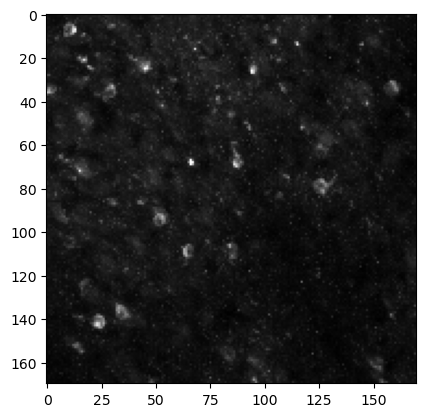


Correlation image is useful in calcium imaging data analysis to identify regions of correlated activity. Brigh pixels from active neurons will typically be highly correlated with its neighbors.

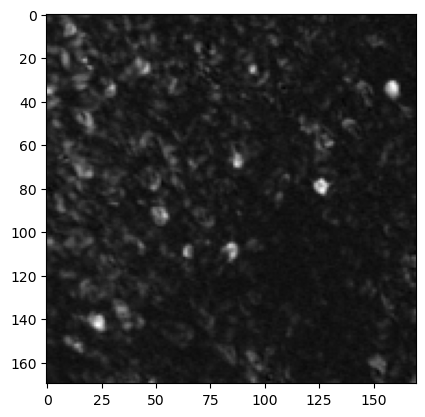

## Rigid Motion Correction

 Rigid motion correction in CaImAn corrects for global, uniform shifts in the imaging data. It assumes the entire field of view moves in the same direction and by the same amount.

```python
# Step 1: Set path to file
fnames = ["data/Sue_2x_3000_40_-46.tif"] 

# Step 2: Create a motion correct object
# for rigid motion correction: set pw_rigid = False
mc_rigid = MotionCorrect(
    fname = fnames,
    pw_rigid = False
)

# Step 3: Use motion_correct method of MotionCorrect object
# and save the movie
mc_rigid.motion_correct(save_movie=True)

```


In [5]:
fnames = ["data/Sue_2x_3000_40_-46.tif"] 
mc_rigid = MotionCorrect(
    fname = fnames,
    pw_rigid = False
)
mc_rigid.motion_correct(save_movie=True)

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)


The `save_movie = True` makes a memory mapped file which you can see in `data/` folder. A memory-mapped file allows the programs to treat the mapped portion of the file as if it were primary memory. 

**Example** Find the name of the rigid motion-corrected, memory mapped file.

In [6]:
mc_rigid.fname_tot_rig

['data\\Sue_2x_3000_40_-46_rig__d1_170_d2_170_d3_1_order_F_frames_3000.mmap']

Find the name of the motion corrected memory mapped file with another attribute of `mc_rigid` instead of `fname_tot_rig`.

Hint: type `mc_rigid.` and look into the options provided by autocomplete options and use one that is closely related to memory mapped file

['data\\Sue_2x_3000_40_-46_rig__d1_170_d2_170_d3_1_order_F_frames_3000.mmap']

When performing rigid motion correction, the process often involves shifting the entire image to align it with a reference frame or image. This alignment can create borders around the edge of the corrected images where no data is available because the image has been moved away from those edges. The `border_nan` attribute is designed to address how these borders are handled. We have not set this to any value. So let's see if the borders have been set to NaN.

Using `mc_rigid` check if border_nan has been set to True.

True

How many pixels from border are empty? Use `border_to_0` attribute of `mc_rigid`

3

Load the motion corrected file and play the movie

100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


**Example** Compare mean frames of raw data and motion corrected data. 

motion corrected image looks sharper than the raw image as the frames are more aligned compared to the raw frames.

Do you notice the empty borders? They are empty because `border_to_nan` is set to True by default.

Text(0.5, 1.0, 'Rigid MC Mean')

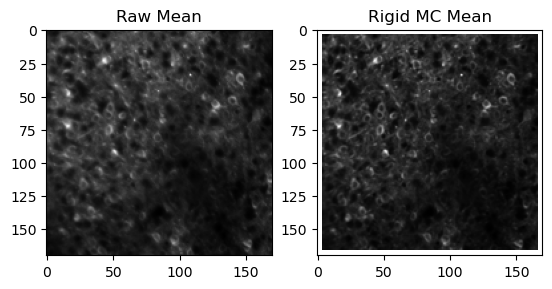

In [11]:
raw_mean = np.mean(raw_data_2p, axis=0)
mc_rigid_mean = np.mean(rigid_data_2p, axis=0)

plt.subplot(121)
plt.imshow(raw_mean, cmap='gray')
plt.title('Raw Mean')

plt.subplot(122)
plt.imshow(mc_rigid_mean, cmap='gray')
plt.title('Rigid MC Mean')

Compare correlation images of raw data and motion corrected data 


Text(0.5, 1.0, 'Rigid MC Correlation')

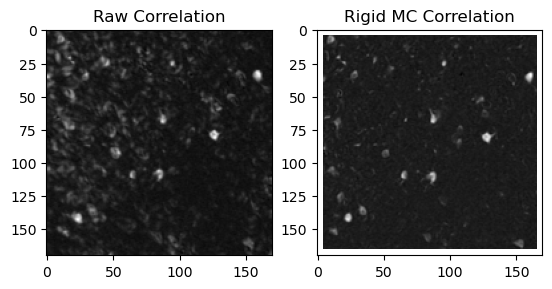

Do the whole process of motion correction but let caiman replicate values along border by setting the attribute `border_nan` to 'copy' within MotionCorrect() class.

In [15]:
filename = mc_rigid.fname_tot_rig
rigid_data_2p = cm.load(filename)

100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


Compare mean frames of raw data and motion corrected data. 

Text(0.5, 1.0, 'Rigid MC Mean')

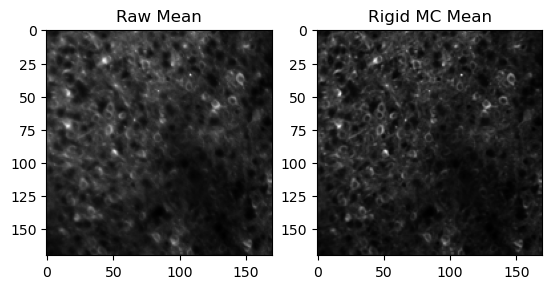

## Piece-wise Rigid Motion Correction

Non-rigid motion correction divides the imaging data into overlapping patches and corrects for movement within each patch independently. This allows for varying movements across different parts of the image

Set `pw_rigid=True` in MotionCorrect object called `mc_els` to trigger piece-wise rigid correction. Also, make caiman copy values along border instead of filling with nan 

Piece-wise rigid motion correction does not create same file as rigid motion correction.

Does the above operation create a rigid motion corrected data?

Let's check

[None]

What is the name of piece-wise rigid corrected data?

['data\\Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1_order_F_frames_3000.mmap']

Using mc_els check what is the overlap in x and y pixels?

(32, 32)

Using mc_els check what is the stride in x and y pixels?

(96, 96)

Let's load motion corrected file

100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


## `params` Object For Motion Correction

`CaImAn` allows us to control the size and overlap of the patches used in piece-wise rigid motion correction by making use of `CNMFParams()`.

`CNMFParams()` is a parameter object that we can use to assign attributes of different aspects of analysis such as data specific params, motion correction params, and source extraction params. We will look more into its structure here

Run the below cell and look into the structure of `params`?

In [23]:
params = CNMFParams()
params 

CNMFParams:

data:

{'caiman_version': '1.9.16',
 'decay_time': 0.4,
 'dims': None,
 'dxy': (1, 1),
 'fnames': None,
 'fr': 30,
 'last_commit': 'GITW-609fdf47acc6ca42f7112f1cd1d5482e5ea94c57',
 'mmap_C': None,
 'mmap_F': None,
 'var_name_hdf5': 'mov'}

spatial_params:

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': None,
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 1,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': None,
 'ss': None,
 'thr_method': 'nrg',
 'update_background_components': True}

temporal_params:

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 'fudge_factor': 0.96,
 'lags': 5,
 'memory_efficient': False,
 'method_deconvolution': 'oasis',
 'nb': 1,
 'noise_method': 'mean',
 'noise_range': [0.25, 0.5],
 'n

`params` has parameters related to `data`, `motion`, `spatial_params`, `temporal_params` etc.

**Example** What are the data specific parameters?

In [24]:
params.data

{'fnames': None,
 'dims': None,
 'fr': 30,
 'decay_time': 0.4,
 'dxy': (1, 1),
 'var_name_hdf5': 'mov',
 'caiman_version': '1.9.16',
 'last_commit': 'GITW-609fdf47acc6ca42f7112f1cd1d5482e5ea94c57',
 'mmap_F': None,
 'mmap_C': None}

What are temporal parameters?

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 'fudge_factor': 0.96,
 'lags': 5,
 'optimize_g': False,
 'memory_efficient': False,
 'method_deconvolution': 'oasis',
 'nb': 1,
 'noise_method': 'mean',
 'noise_range': [0.25, 0.5],
 'num_blocks_per_run_temp': 20,
 'p': 2,
 's_min': None,
 'solvers': ['ECOS', 'SCS'],
 'verbosity': False}

What are spatial parameters?

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0],
        [1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': None,
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 1,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': None,
 'ss': None,
 'thr_method': 'nrg',
 'update_background_components': True}

What are motion correction parameters? What do you think each of these parameters are for?

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 3,
 'max_shifts': (6, 6),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (32, 32),
 'pw_rigid': False,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (96, 96),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

It has many parameters but the important ones are `strides`, `overlaps`, `max_shifts`, `max_deviation_rigid`, and `pw_rigid`.

Once a `params` has been created, it can be updated easily. This allows us to change each parameter one at a time.

**Example** Update strides to (2, 2)

In [28]:
motion_params = {
    'strides': (2, 2)
}
params.motion.update(motion_params)
params.motion

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 3,
 'max_shifts': (6, 6),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (32, 32),
 'pw_rigid': False,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (2, 2),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

Update overlaps to (10, 10)

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 3,
 'max_shifts': (6, 6),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (10, 10),
 'pw_rigid': False,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (2, 2),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

Update max_shifts to (4, 4)

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 3,
 'max_shifts': (4, 4),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (10, 10),
 'pw_rigid': False,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (2, 2),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

Update `max_deviation_rigid` to 4 and `pw_rigid` to True together

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 4,
 'max_shifts': (4, 4),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (10, 10),
 'pw_rigid': True,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (2, 2),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

Change stride to (48, 48) and overlaps to (24, 24). We will use this for piece-wise rigid motion correction

Run the below cell to use the params dictionary to do motion correction

In [33]:
filename = "data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
mc = MotionCorrect(fnames, **params.motion)
mc.motion_correct(save_movie=True)

## What else can we do with MotionCorrect object?

Visualizing shifts for rigid motion correction. We will use CNMFParams() for this. 

In [ ]:
params = CNMFParams() 
motion_params = {
    'pw_rigid': False
}
params.motion.update(
    motion_params
)

filename = "data/Sue_2x_3000_40_-46.tif"
fnames = [filename]

mc_rigid = MotionCorrect(fnames, **params.motion)
mc_rigid.motion_correct(save_movie=True)

Visualizing shifts in X and Y in each frame

In [ ]:
shifts = mc_rigid.shifts_rig
plt.plot(shifts)
plt.xlabel('Frames')
plt.ylabel('Pixels')
plt.legend(['X shifts','Y shifts'])

Visualizing shifts for non-rigid motion correction. In this case, different patches can have different shifts as they are corrected separately. Let's see how to visualize them

We will use CNMFParams() for this. 

In [ ]:
params = CNMFParams() 
motion_params = {
    'pw_rigid': True
}
params.motion.update(
    motion_params
)

filename = "data/Sue_2x_3000_40_-46.tif"
fnames = [filename]

mc_pw_rigid = MotionCorrect(fnames, **params.motion)
mc_pw_rigid.motion_correct(save_movie=True)

We can check the number of patches created using x_shifts_els or y_shifts_els

x_shifts_els and y_shifts_els has 3000 lists and each list has 4 values indicating shift in 4 different patches.

In [ ]:
x_shifts_pw = mc_pw_rigid.x_shifts_els
y_shifts_pw = mc_pw_rigid.y_shifts_els

len(x_shifts_pw[0])

Now, we can plot them as subplots

In [ ]:
patch_1 = [x[0] for x in x_shifts_pw]
patch_2 = [x[1] for x in x_shifts_pw]
patch_3 = [x[2] for x in x_shifts_pw]
patch_4 = [x[3] for x in x_shifts_pw]

plt.subplot(411)
plt.plot(patch_1)

plt.subplot(412)
plt.plot(patch_2)

plt.subplot(413)
plt.plot(patch_3)

plt.subplot(414)
plt.plot(patch_4)

plt.tight_layout()

In [ ]:
patch_1 = [y[0] for y in y_shifts_pw]
patch_2 = [y[1] for y in y_shifts_pw]
patch_3 = [y[2] for y in y_shifts_pw]
patch_4 = [y[3] for y in y_shifts_pw]

plt.subplot(411)
plt.plot(patch_1)

plt.subplot(412)
plt.plot(patch_2)

plt.subplot(413)
plt.plot(patch_3)

plt.subplot(414)
plt.plot(patch_4)

plt.tight_layout()

**References**

1. `data_endoscope.tif` 1-photon microendoscopic data from mouse dorsal striatum [Reference](https://elifesciences.org/articles/28728#s3).
2. `Sue_2x_3000_40_-46.tif` (taken from CaImAn) dataset by Sue Koay and David Tank. 2-photon data from supragranular parietal cortex mouse during a virtual reality task.
3. [Motion Correction: Watch video between 10 to 16 minutes](https://www.youtube.com/watch?v=5APzPRbzUIA)